
Use Backorders Data set and build the following models and report the performance metrics:

Build ANN Models with the following Criteria and report the performance metrics for each experiment
Experiment the models with ReLU and sigmoid and note the performance 
Experiment the learning rates and note down the model performance
0.01
0.001 
0.00001
What is momentum? Experiment with optimizer SGD with 3 momentum values and report the results [0.01, 0.001, 0.0001]
Experiment with optimizer with RMSProp with 3 learning rates values and report the results [0.01, 0.001, 0.0001]
Experiment with optimizer with Adam with 3 learning rates values and report the results   [0.01, 0.001, 0.0001]
Weight Initialization ? Experiment with kernel_initializer and report the results 
‘glorot_normal’  
‘random_normal’ 
 ‘random_uniform’

Regularization (Dropout): Experiment with the following dropout ratios and report the model performance

10%
25%
50%

Build 2 models one model without Batch normalization and one without batch normalization and report the results


In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import sklearn
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm # import stats model o/p : R model
from sklearn.model_selection import train_test_split # importing neccessary modules
from sklearn.metrics import confusion_matrix, roc_curve, auc,recall_score
from sklearn.neighbors import KNeighborsRegressor

In [241]:
df = pd.read_csv("BackOrders.csv")
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61584,1397275,6,8.0,0,24,24,24,0,7,9,...,0,0.98,0.98,0,No,No,No,Yes,No,No
61585,3072139,130,2.0,0,40,80,140,18,108,230,...,0,0.51,0.28,0,No,No,No,Yes,No,No
61586,1909363,135,9.0,0,0,0,0,10,40,65,...,0,1.00,0.99,0,No,No,Yes,Yes,No,No
61587,1845783,63,NaN,0,0,0,0,452,1715,3425,...,0,-99.00,-99.00,1,No,No,No,No,No,Yes


In [242]:
num_missing = df.isnull().sum()
num_missing

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [243]:
df = df.dropna(0)

In [244]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No
5,3002608,297,12.0,0,0,0,0,5,6,44,...,0,0.58,0.75,0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61583,1453874,80,2.0,0,0,0,0,7,8,9,...,0,1.00,0.91,0,Yes,No,No,Yes,No,No
61584,1397275,6,8.0,0,24,24,24,0,7,9,...,0,0.98,0.98,0,No,No,No,Yes,No,No
61585,3072139,130,2.0,0,40,80,140,18,108,230,...,0,0.51,0.28,0,No,No,No,Yes,No,No
61586,1909363,135,9.0,0,0,0,0,10,40,65,...,0,1.00,0.99,0,No,No,Yes,Yes,No,No


In [245]:
df.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,5.818600e+04,58186.000000,58186.000000,58186.000000,5.818600e+04,5.818600e+04,5.818600e+04,58186.000000,58186.000000,5.818600e+04,...,58186.000000,58186.000000,58186.000000,58186.000000,58186,58186,58186,58186,58186,58186
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,46791,58174,50916,56736,58173,47217
mean,2.036023e+06,281.245987,7.559619,31.338123,1.780929e+02,3.313014e+02,4.771002e+02,45.347575,153.180610,2.888281e+02,...,1.696766,-0.840541,-0.416599,1.259977,NaN,NaN,NaN,NaN,NaN,NaN
std,6.559779e+05,4321.329801,6.498952,814.665767,5.438487e+03,1.005456e+04,1.460902e+04,1408.074630,5360.176586,9.101474e+03,...,43.525034,12.567315,10.786604,30.819641,NaN,NaN,NaN,NaN,NaN,NaN
min,1.111623e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,-99.000000,-99.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.497660e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.680000,0.670000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.896924e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,2.000000,4.000000e+00,...,0.000000,0.830000,0.820000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.313823e+06,55.000000,8.000000,0.000000,1.400000e+01,2.800000e+01,4.200000e+01,6.000000,18.000000,3.600000e+01,...,0.000000,0.970000,0.950000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
df_clean = df
df2 = df_clean


In [247]:
df.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [248]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [249]:
col_drop = [ 'sku']
col_to_cat = ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']

for col in col_to_cat:
    df2[col] = df2[col].astype('category')
df2.dtypes

sku                     int64
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

In [250]:
dff = df2.drop(columns=col_drop ,axis = 1)   # Dropping column sku 

In [251]:
dff = pd.get_dummies(dff,drop_first=True,dtype='int8') # Dummification

In [252]:
dff

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
1,7,2.0,0,0,0,0,0,0,0,0,...,0.50,0.28,0,0,1,0,0,1,0,0
2,258,15.0,10,10,77,184,46,132,256,365,...,0.54,0.70,0,0,0,0,0,1,0,0
3,46,2.0,0,0,0,0,1,2,6,9,...,0.75,0.90,0,0,1,0,0,1,0,0
4,2,2.0,0,4,6,10,2,2,5,6,...,0.97,0.92,0,0,0,0,0,1,0,0
5,297,12.0,0,0,0,0,5,6,44,57,...,0.58,0.75,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61583,80,2.0,0,0,0,0,7,8,9,15,...,1.00,0.91,0,0,1,0,0,1,0,0
61584,6,8.0,0,24,24,24,0,7,9,12,...,0.98,0.98,0,0,0,0,0,1,0,0
61585,130,2.0,0,40,80,140,18,108,230,317,...,0.51,0.28,0,0,0,0,0,1,0,0
61586,135,9.0,0,0,0,0,10,40,65,89,...,1.00,0.99,0,0,0,0,1,1,0,0


In [253]:
dff.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes', 'went_on_backorder_Yes'],
      dtype='object')

### Train Test split 

In [254]:
X = dff.drop(['went_on_backorder_Yes'],axis=1)
y = dff['went_on_backorder_Yes']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [255]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# ANN
## ADAM Learning rate 0.01 

### Interpretation  : Just the right learning rate not too high not too low

In [256]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [257]:
np.random.seed(42)
tf.random.set_seed(42)

In [258]:
X_train.shape

(32729, 21)

In [259]:
model = keras.models.Sequential([                                                                                           ## RELU MODEL
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [260]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_133 (Dense)           (None, 30)                660       
                                                                 
 dense_134 (Dense)           (None, 30)                930       
                                                                 
 dense_135 (Dense)           (None, 1)                 31        
                                                                 
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [261]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [262]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [263]:
model_history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 4s 2ms/step - loss: 2.9013 - binary_accuracy: 0.8119 - false_negatives_43: 6156.0000 - val_loss: 2.9266 - val_binary_accuracy: 0.8103 - val_false_negatives_43: 2070.0000
Epoch 2/100
1023/1023 [==============================] - 2s 2ms/step - loss: 2.9013 - binary_accuracy: 0.8119 - false_negatives_43: 6156.0000 - val_loss: 2.9266 - val_binary_accuracy: 0.8103 - val_false_negatives_43: 2070.0000
Epoch 3/100
1023/1023 [==============================] - 2s 2ms/step - loss: 2.9013 - binary_accuracy: 0.8119 - false_negatives_43: 6156.0000 - val_loss: 2.9266 - val_binary_accuracy: 0.8103 - val_false_negatives_43: 2070.0000


In [264]:
mae_test = model.evaluate(X_test, y_test)

455/455 [==============================] - 1s 2ms/step - loss: 2.9085 - binary_accuracy: 0.8114 - false_negatives_43: 2743.0000


In [265]:
model_history.history

{'loss': [2.901287794113159, 2.9012868404388428, 2.9012868404388428],
 'binary_accuracy': [0.8119099140167236,
  0.8119099140167236,
  0.8119099140167236],
 'false_negatives_43': [6156.0, 6156.0, 6156.0],
 'val_loss': [2.9266388416290283, 2.9266388416290283, 2.9266388416290283],
 'val_binary_accuracy': [0.810265839099884,
  0.810265839099884,
  0.810265839099884],
 'val_false_negatives_43': [2070.0, 2070.0, 2070.0]}

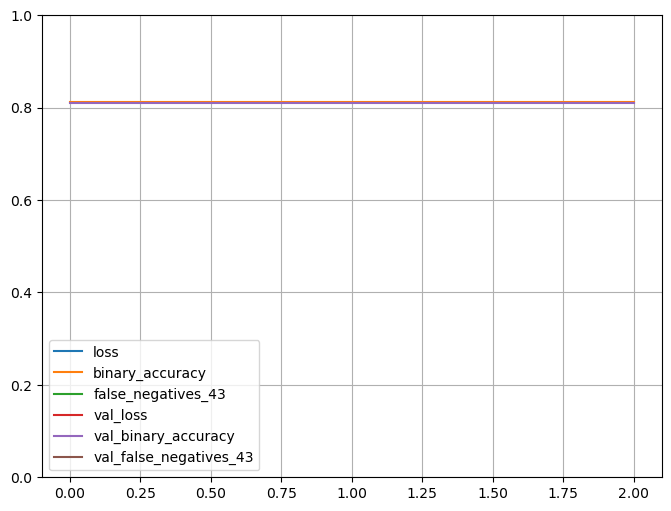

In [266]:
pd.DataFrame(model_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [267]:
def plot(model_history, plot_type):
    val_type = "val_"+plot_type
    plt.plot(model_history.history[plot_type])
    plt.plot(model_history.history[val_type])
    plt.title(plot_type + ' Plot')
    plt.xlabel('Epoch')
    plt.ylabel(val_type)
    plt.legend(['Train', 'Validation'])
    plt.show()

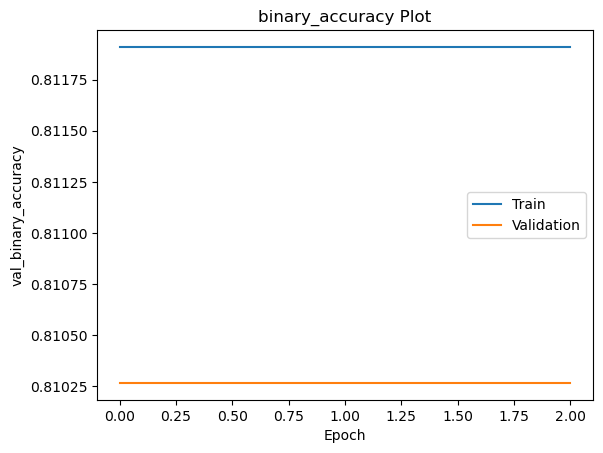

In [268]:
plot(model_history, 'binary_accuracy')

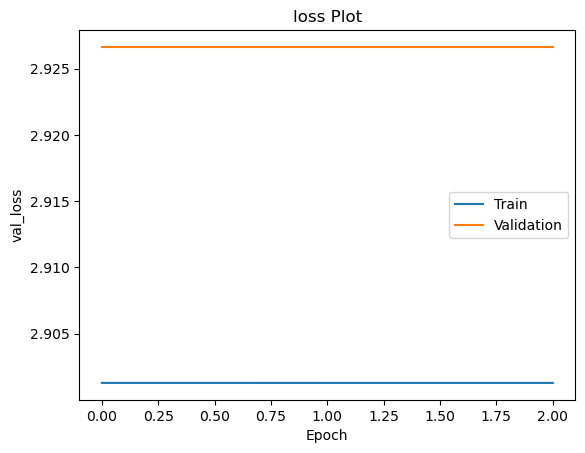

In [269]:
plot(model_history,'loss')

### SIGMOID MODEL 

In [270]:
model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation="sigmoid", input_shape=[21]),
    keras.layers.Dense(40, activation="sigmoid"),
    keras.layers.Dense(1)
])

In [271]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [272]:
model2_history = model2.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 5s 3ms/step - loss: 2.9013 - binary_accuracy: 0.8119 - false_negatives_44: 6156.0000 - val_loss: 2.9266 - val_binary_accuracy: 0.8103 - val_false_negatives_44: 2070.0000
Epoch 2/100
1023/1023 [==============================] - 2s 2ms/step - loss: 2.9013 - binary_accuracy: 0.8119 - false_negatives_44: 6156.0000 - val_loss: 2.9266 - val_binary_accuracy: 0.8103 - val_false_negatives_44: 2070.0000
Epoch 3/100
1023/1023 [==============================] - 2s 2ms/step - loss: 2.9013 - binary_accuracy: 0.8119 - false_negatives_44: 6156.0000 - val_loss: 2.9266 - val_binary_accuracy: 0.8103 - val_false_negatives_44: 2070.0000


In [273]:
m2_test = model2.evaluate(X_test, y_test)

455/455 [==============================] - 1s 1ms/step - loss: 2.9085 - binary_accuracy: 0.8114 - false_negatives_44: 2743.0000


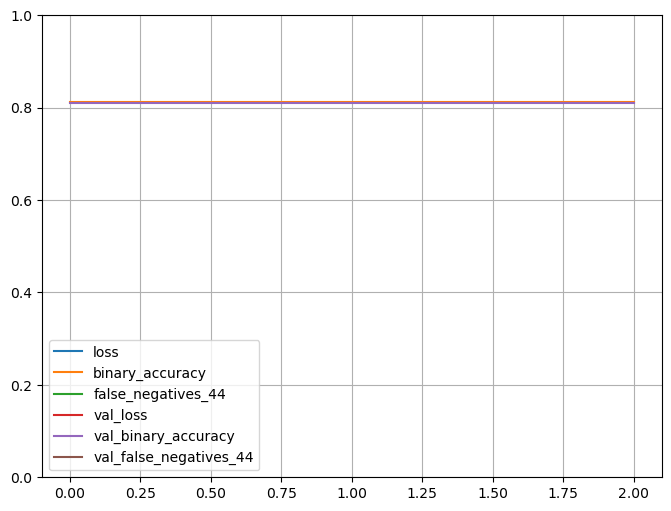

In [274]:
pd.DataFrame(model2_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

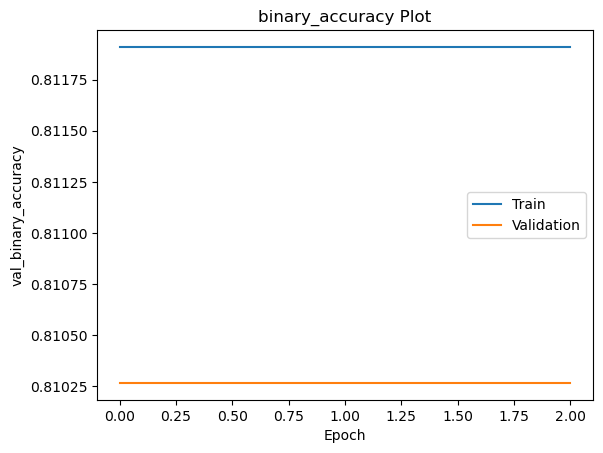

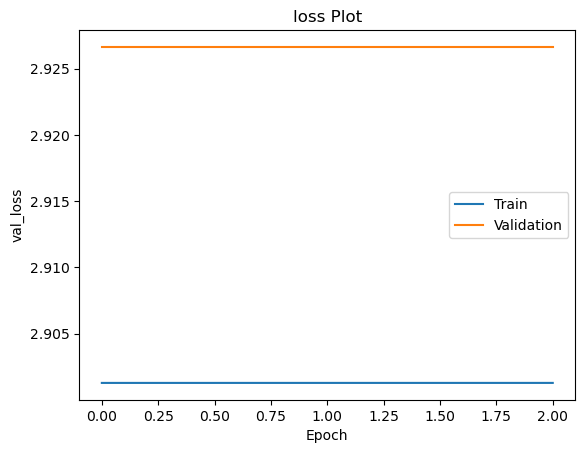

In [275]:
plot(model2_history, 'binary_accuracy')
plot(model2_history,'loss')

## Model 3 : ADAM LR 0.01

### interpretation :  Learning rate too high as the model stops at 6 epochs but it is finding the minima faster

In [276]:
model3 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [277]:
model3_history = model3.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 4s 3ms/step - loss: 0.6527 - binary_accuracy: 0.8133 - false_negatives_45: 5783.0000 - val_loss: 0.7284 - val_binary_accuracy: 0.8103 - val_false_negatives_45: 2070.0000
Epoch 2/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6570 - binary_accuracy: 0.8124 - false_negatives_45: 5704.0000 - val_loss: 0.6497 - val_binary_accuracy: 0.8374 - val_false_negatives_45: 1239.0000
Epoch 3/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6225 - binary_accuracy: 0.8113 - false_negatives_45: 5574.0000 - val_loss: 0.5876 - val_binary_accuracy: 0.8191 - val_false_negatives_45: 1933.0000
Epoch 4/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.7941 - binary_accuracy: 0.8217 - false_negatives_45: 5486.0000 - val_loss: 0.5572 - val_binary_accuracy: 0.8208 - val_false_negatives_45: 1901.0000
Epoch 5/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.7122 - binary

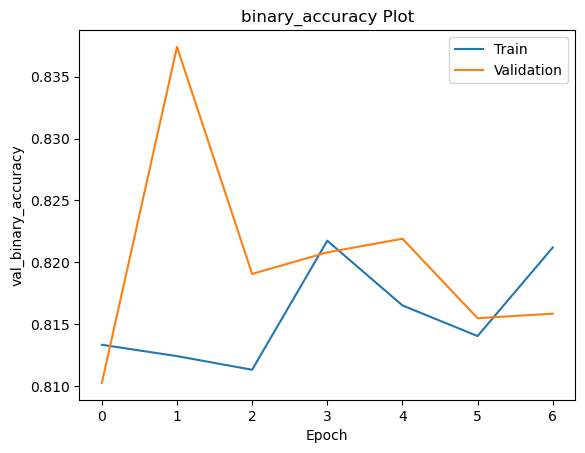

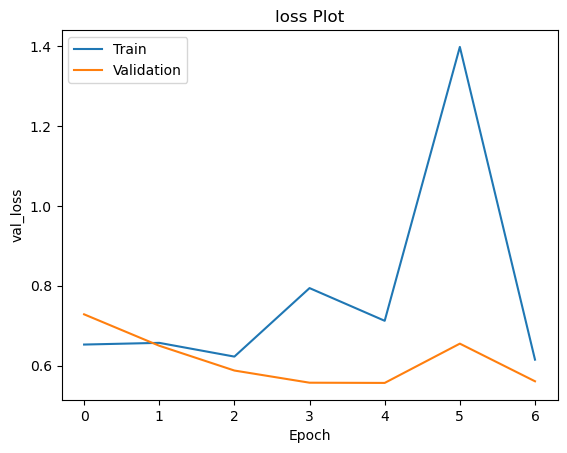

In [278]:
plot(model3_history, 'binary_accuracy')
plot(model3_history,'loss')

In [279]:
m3_test = model3.evaluate(X_test, y_test)

455/455 [==============================] - 1s 2ms/step - loss: 0.5793 - binary_accuracy: 0.8174 - false_negatives_45: 2613.0000


## Model 4 : ADAM LR 0.0001

### Learning rate is too low and it takes a while to find the minima (more precise)

In [280]:
model4 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [281]:
model4_history = model4.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.7566 - binary_accuracy: 0.8115 - false_negatives_46: 6043.0000 - val_loss: 0.5339 - val_binary_accuracy: 0.8089 - val_false_negatives_46: 2037.0000
Epoch 2/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5338 - binary_accuracy: 0.8117 - false_negatives_46: 6030.0000 - val_loss: 0.5236 - val_binary_accuracy: 0.8091 - val_false_negatives_46: 2039.0000
Epoch 3/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5224 - binary_accuracy: 0.8124 - false_negatives_46: 6003.0000 - val_loss: 0.5106 - val_binary_accuracy: 0.8097 - val_false_negatives_46: 2025.0000
Epoch 4/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5004 - binary_accuracy: 0.8131 - false_negatives_46: 5999.0000 - val_loss: 0.5043 - val_binary_accuracy: 0.8101 - val_false_negatives_46: 2033.0000
Epoch 5/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4952 - binary

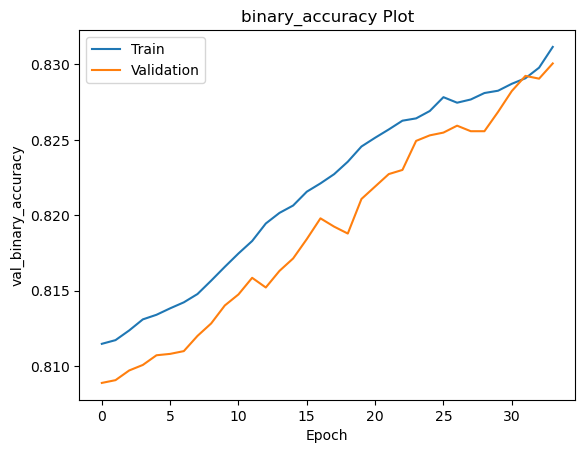

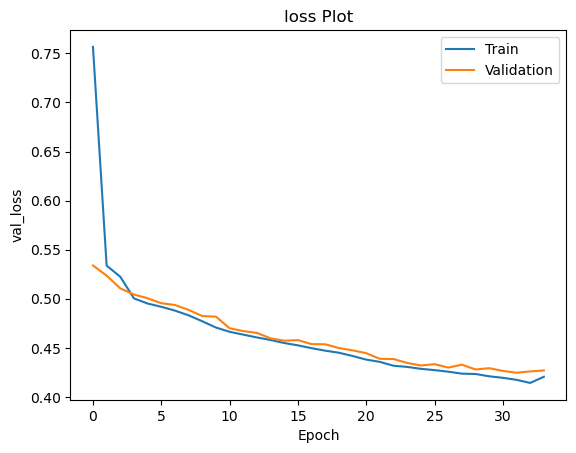

In [282]:
plot(model4_history, 'binary_accuracy')
plot(model4_history,'loss')

In [283]:
m4_test = model4.evaluate(X_test, y_test)

455/455 [==============================] - 1s 1ms/step - loss: 0.4291 - binary_accuracy: 0.8310 - false_negatives_46: 2335.0000


## Model 5 : SGD momentum 0.0001

In [284]:
model5 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model5.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum =0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [285]:

model5_history = model5.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 5s 4ms/step - loss: 1.5854 - binary_accuracy: 0.8101 - false_negatives_47: 6054.0000 - val_loss: 0.5223 - val_binary_accuracy: 0.8100 - val_false_negatives_47: 2044.0000
Epoch 2/100
1023/1023 [==============================] - 4s 4ms/step - loss: 0.5365 - binary_accuracy: 0.8122 - false_negatives_47: 6025.0000 - val_loss: 0.5161 - val_binary_accuracy: 0.8104 - val_false_negatives_47: 2032.0000
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5140 - binary_accuracy: 0.8135 - false_negatives_47: 6024.0000 - val_loss: 0.5070 - val_binary_accuracy: 0.8109 - val_false_negatives_47: 2029.0000
Epoch 4/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5044 - binary_accuracy: 0.8140 - false_negatives_47: 6011.0000 - val_loss: 0.5036 - val_binary_accuracy: 0.8115 - val_false_negatives_47: 2031.0000
Epoch 5/100
1023/1023 [==============================] - 2s 2ms/step - loss: 1.6831 - binary

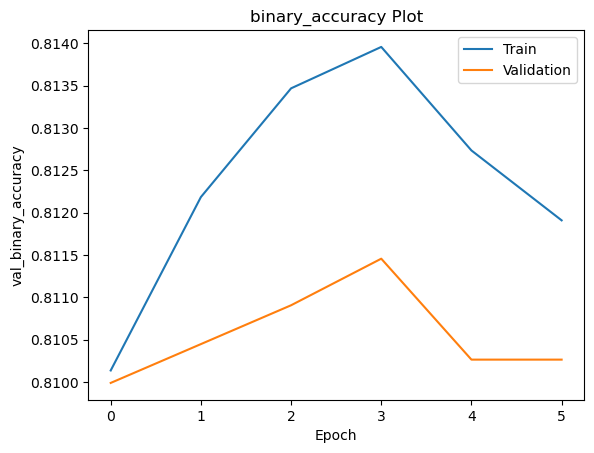

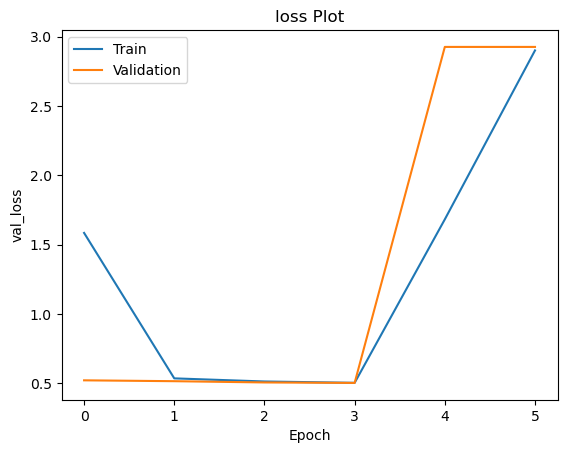

In [286]:
plot(model5_history, 'binary_accuracy')
plot(model5_history,'loss')

In [287]:
m5_test = model5.evaluate(X_test, y_test)

455/455 [==============================] - 1s 2ms/step - loss: 2.9085 - binary_accuracy: 0.8114 - false_negatives_47: 2743.0000


## Model 6 : SGD Momentum: 0.001

In [288]:
model6 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum =0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [289]:

model6_history = model6.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 4s 3ms/step - loss: 2.9013 - binary_accuracy: 0.8119 - false_negatives_48: 6156.0000 - val_loss: 2.9266 - val_binary_accuracy: 0.8103 - val_false_negatives_48: 2070.0000
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 2.9013 - binary_accuracy: 0.8119 - false_negatives_48: 6156.0000 - val_loss: 2.9266 - val_binary_accuracy: 0.8103 - val_false_negatives_48: 2070.0000
Epoch 3/100
1023/1023 [==============================] - 2s 2ms/step - loss: 2.9013 - binary_accuracy: 0.8119 - false_negatives_48: 6156.0000 - val_loss: 2.9266 - val_binary_accuracy: 0.8103 - val_false_negatives_48: 2070.0000


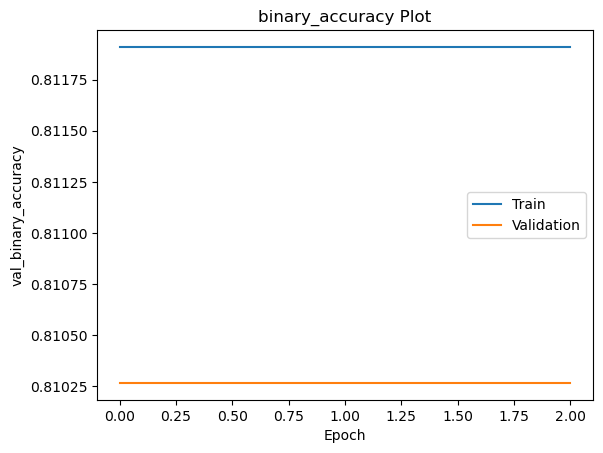

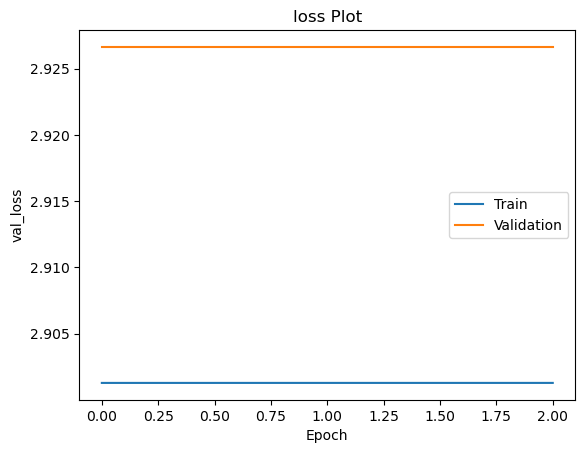

In [290]:
plot(model6_history, 'binary_accuracy')
plot(model6_history,'loss')

In [291]:
m6_test = model6.evaluate(X_test, y_test)

455/455 [==============================] - 1s 1ms/step - loss: 2.9085 - binary_accuracy: 0.8114 - false_negatives_48: 2743.0000


## Model 7 : SGD Momentum : 0.01

In [292]:
model7 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model7.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum =0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [293]:
model7_history = model7.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 4s 3ms/step - loss: 0.7057 - binary_accuracy: 0.8029 - false_negatives_49: 6111.0000 - val_loss: 0.5129 - val_binary_accuracy: 0.8092 - val_false_negatives_49: 2057.0000
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5274 - binary_accuracy: 0.8098 - false_negatives_49: 6103.0000 - val_loss: 0.5046 - val_binary_accuracy: 0.8101 - val_false_negatives_49: 2058.0000
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5167 - binary_accuracy: 0.8120 - false_negatives_49: 6108.0000 - val_loss: 0.5026 - val_binary_accuracy: 0.8103 - val_false_negatives_49: 2059.0000
Epoch 4/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5156 - binary_accuracy: 0.8118 - false_negatives_49: 6080.0000 - val_loss: 0.5001 - val_binary_accuracy: 0.8104 - val_false_negatives_49: 2051.0000
Epoch 5/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5098 - binary

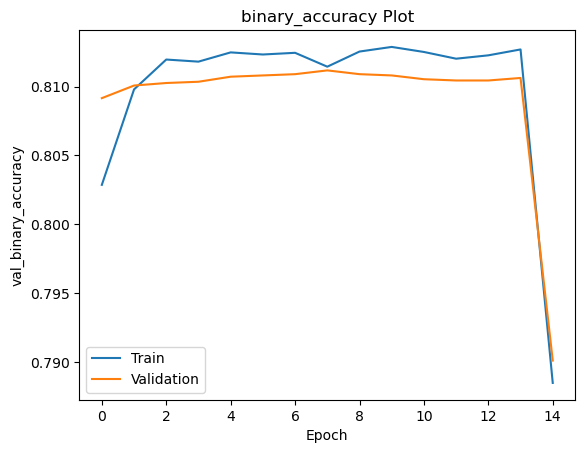

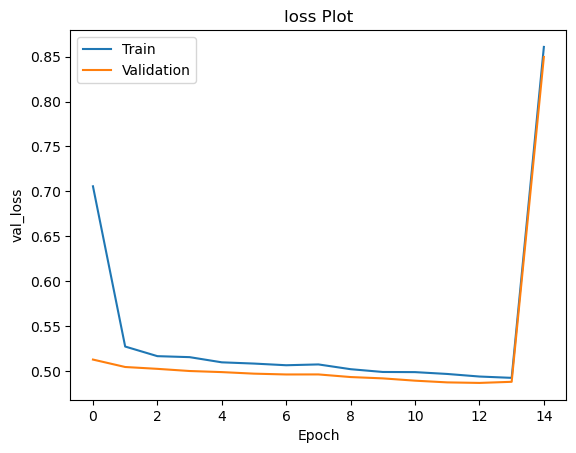

In [294]:
plot(model7_history, 'binary_accuracy')
plot(model7_history,'loss')

In [295]:
m7_test = model7.evaluate(X_test, y_test)

455/455 [==============================] - 1s 2ms/step - loss: 0.8413 - binary_accuracy: 0.7938 - false_negatives_49: 2607.0000


### Model 7 is overfitted, should have stopped at 13 epochs 

## Model 8 : RMS PROP LR 0.01 and glorot_normal 

In [296]:
model8 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21], kernel_initializer = tf.keras.initializers.GlorotNormal()),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model8.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-2),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [297]:
model8_history = model8.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 4s 3ms/step - loss: 0.7646 - binary_accuracy: 0.8144 - false_negatives_50: 5602.0000 - val_loss: 0.5906 - val_binary_accuracy: 0.8196 - val_false_negatives_50: 1882.0000
Epoch 2/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6212 - binary_accuracy: 0.8235 - false_negatives_50: 5223.0000 - val_loss: 0.6146 - val_binary_accuracy: 0.8314 - val_false_negatives_50: 1726.0000
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.6385 - binary_accuracy: 0.8283 - false_negatives_50: 4975.0000 - val_loss: 0.5559 - val_binary_accuracy: 0.8478 - val_false_negatives_50: 1476.0000
Epoch 4/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6414 - binary_accuracy: 0.8308 - false_negatives_50: 4728.0000 - val_loss: 0.6099 - val_binary_accuracy: 0.8445 - val_false_negatives_50: 1302.0000
Epoch 5/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6273 - binary

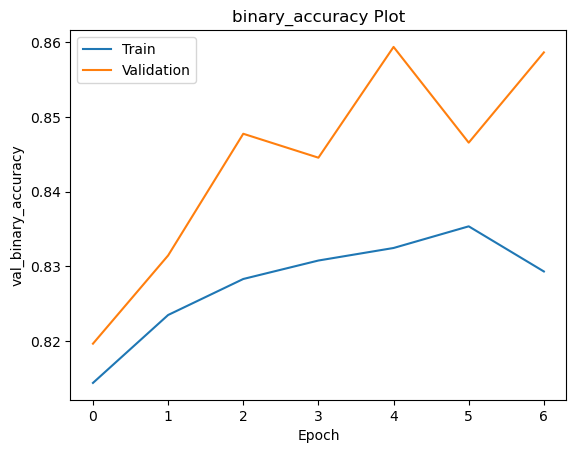

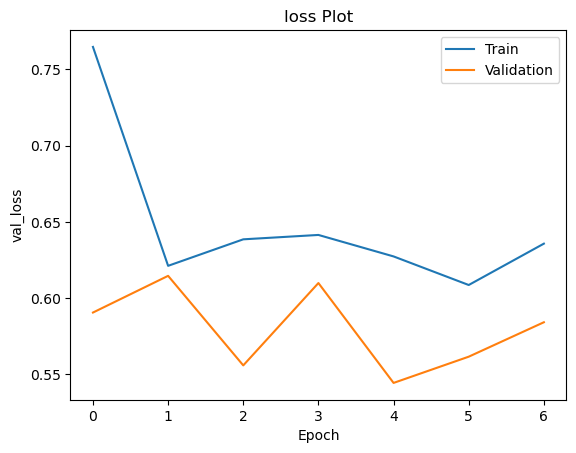

In [298]:
plot(model8_history, 'binary_accuracy')
plot(model8_history,'loss')

In [299]:
m8_test = model8.evaluate(X_test, y_test)

455/455 [==============================] - 1s 1ms/step - loss: 0.6196 - binary_accuracy: 0.8556 - false_negatives_50: 1839.0000


## Model 9 : RMS PROP LR 0.001 and random_normal 

In [300]:
model9 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21], kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model9.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [301]:
model9_history = model9.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5067 - binary_accuracy: 0.8176 - false_negatives_51: 5797.0000 - val_loss: 0.4764 - val_binary_accuracy: 0.8214 - val_false_negatives_51: 1848.0000
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.4941 - binary_accuracy: 0.8265 - false_negatives_51: 5371.0000 - val_loss: 0.4866 - val_binary_accuracy: 0.8289 - val_false_negatives_51: 1731.0000
Epoch 3/100
1023/1023 [==============================] - 3s 2ms/step - loss: 0.4975 - binary_accuracy: 0.8323 - false_negatives_51: 5055.0000 - val_loss: 0.4569 - val_binary_accuracy: 0.8344 - val_false_negatives_51: 1664.0000
Epoch 4/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.4898 - binary_accuracy: 0.8370 - false_negatives_51: 4833.0000 - val_loss: 0.4791 - val_binary_accuracy: 0.8491 - val_false_negatives_51: 1313.0000
Epoch 5/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5107 - binary

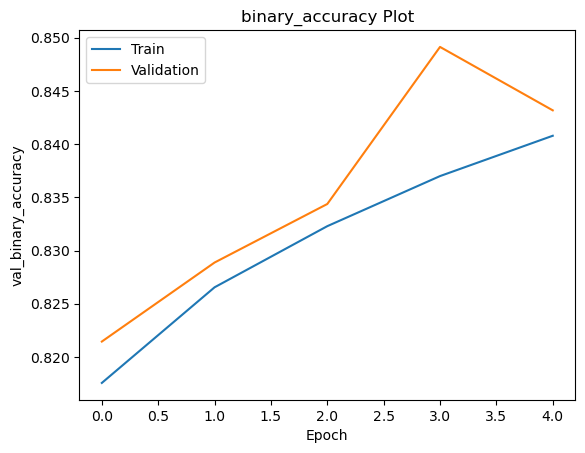

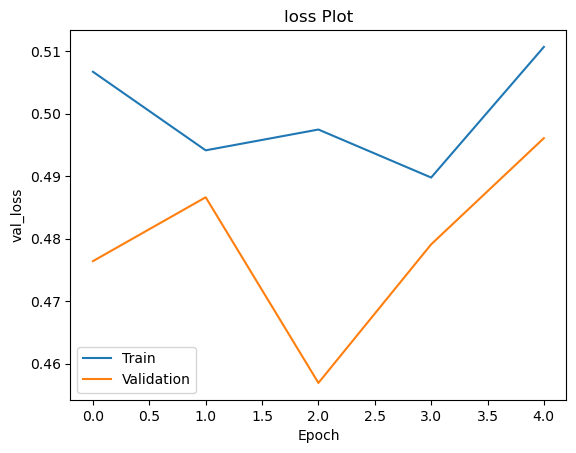

In [302]:
plot(model9_history, 'binary_accuracy')
plot(model9_history,'loss')

In [303]:
m9_test = model9.evaluate(X_test, y_test)

455/455 [==============================] - 1s 1ms/step - loss: 0.5300 - binary_accuracy: 0.8435 - false_negatives_51: 2080.0000


## Model 10 : RMS PROP LR 0.0001 and random_uniform 

In [304]:
model10 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21], kernel_initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model10.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [305]:
model10_history = model10.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 4s 3ms/step - loss: 1.9961 - binary_accuracy: 0.7853 - false_negatives_52: 5898.0000 - val_loss: 0.7259 - val_binary_accuracy: 0.8104 - val_false_negatives_52: 2067.0000
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.6488 - binary_accuracy: 0.8119 - false_negatives_52: 6113.0000 - val_loss: 0.5726 - val_binary_accuracy: 0.8106 - val_false_negatives_52: 2054.0000
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5438 - binary_accuracy: 0.8130 - false_negatives_52: 6038.0000 - val_loss: 0.5132 - val_binary_accuracy: 0.8115 - val_false_negatives_52: 2035.0000
Epoch 4/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5234 - binary_accuracy: 0.8152 - false_negatives_52: 5943.0000 - val_loss: 0.5551 - val_binary_accuracy: 0.8126 - val_false_negatives_52: 2016.0000
Epoch 5/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5117 - binary

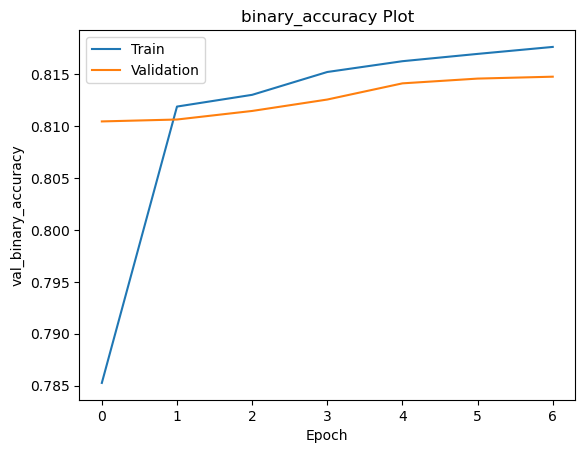

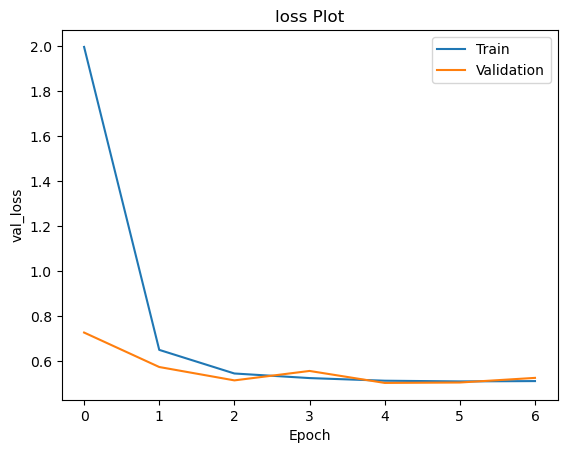

In [306]:
plot(model10_history, 'binary_accuracy')
plot(model10_history,'loss')

In [307]:
m10_test = model10.evaluate(X_test, y_test)

455/455 [==============================] - 1s 1ms/step - loss: 0.5289 - binary_accuracy: 0.8161 - false_negatives_52: 2631.0000


## Model 11 Regularization Dropout 10%

In [308]:
model11 = keras.models.Sequential([
    keras.layers.Dropout(0.1),
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model11.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [309]:
model11_history = model11.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 5s 4ms/step - loss: 0.5294 - binary_accuracy: 0.8075 - false_negatives_53: 5979.0000 - val_loss: 0.5224 - val_binary_accuracy: 0.7941 - val_false_negatives_53: 1819.0000
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5113 - binary_accuracy: 0.8131 - false_negatives_53: 5950.0000 - val_loss: 0.4827 - val_binary_accuracy: 0.8133 - val_false_negatives_53: 2016.0000
Epoch 3/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5078 - binary_accuracy: 0.8163 - false_negatives_53: 5916.0000 - val_loss: 0.4922 - val_binary_accuracy: 0.8129 - val_false_negatives_53: 2022.0000
Epoch 4/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5120 - binary_accuracy: 0.8168 - false_negatives_53: 5841.0000 - val_loss: 0.4757 - val_binary_accuracy: 0.8162 - val_false_negatives_53: 1964.0000
Epoch 5/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.4979 - binary

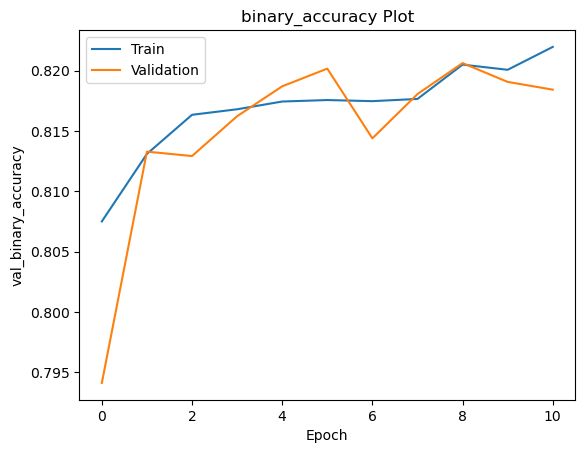

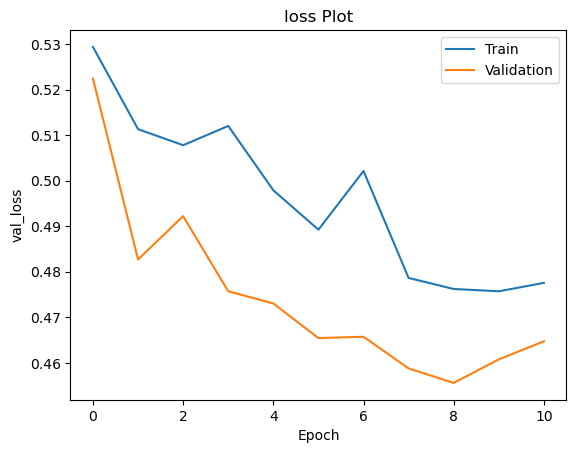

In [310]:
plot(model11_history, 'binary_accuracy')
plot(model11_history,'loss')

In [311]:
m11_test = model11.evaluate(X_test, y_test)

455/455 [==============================] - 1s 3ms/step - loss: 0.4556 - binary_accuracy: 0.8213 - false_negatives_53: 2493.0000


## Model 12 Regularization Dropout 25%

In [312]:
model12 = keras.models.Sequential([
    keras.layers.Dropout(0.25),
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model12.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [313]:
model12_history = model12.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 5s 4ms/step - loss: 0.6085 - binary_accuracy: 0.8115 - false_negatives_54: 5992.0000 - val_loss: 0.5049 - val_binary_accuracy: 0.8124 - val_false_negatives_54: 2023.0000
Epoch 2/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5843 - binary_accuracy: 0.8075 - false_negatives_54: 5836.0000 - val_loss: 0.7047 - val_binary_accuracy: 0.8005 - val_false_negatives_54: 1983.0000
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5897 - binary_accuracy: 0.8106 - false_negatives_54: 5874.0000 - val_loss: 0.5402 - val_binary_accuracy: 0.8113 - val_false_negatives_54: 1990.0000


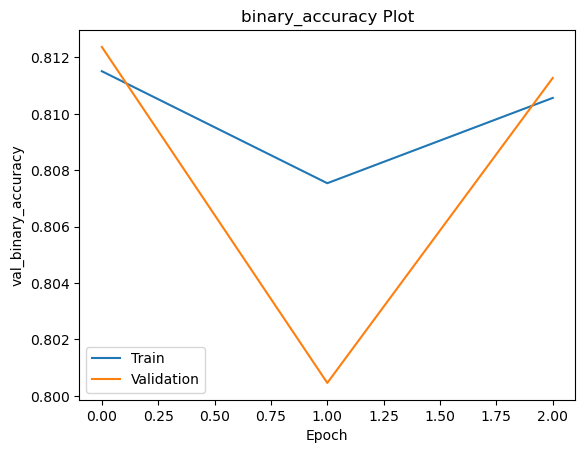

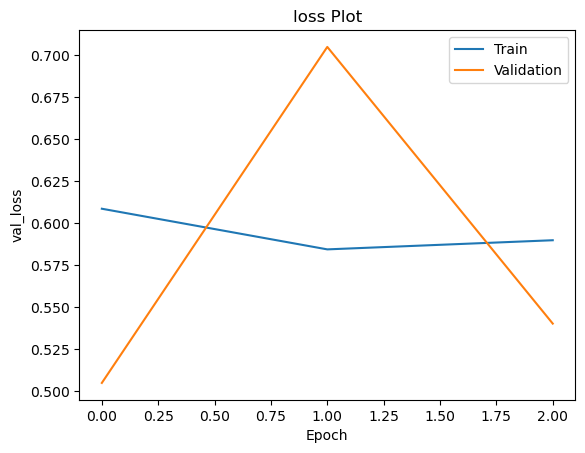

In [314]:
plot(model12_history, 'binary_accuracy')
plot(model12_history,'loss')

In [315]:
m12_test = model12.evaluate(X_test, y_test)

455/455 [==============================] - 1s 1ms/step - loss: 0.5464 - binary_accuracy: 0.8141 - false_negatives_54: 2609.0000


## Model 13 Regularization Dropout 50%

In [316]:
model13 = keras.models.Sequential([
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model13.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
model13_history = model13.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 4s 3ms/step - loss: 0.7277 - binary_accuracy: 0.8085 - false_negatives_55: 6091.0000 - val_loss: 0.5902 - val_binary_accuracy: 0.8102 - val_false_negatives_55: 2061.0000
Epoch 2/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5630 - binary_accuracy: 0.8113 - false_negatives_55: 6066.0000 - val_loss: 0.5743 - val_binary_accuracy: 0.8105 - val_false_negatives_55: 2046.0000
Epoch 3/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5563 - binary_accuracy: 0.8109 - false_negatives_55: 6011.0000 - val_loss: 0.5713 - val_binary_accuracy: 0.8120 - val_false_negatives_55: 2026.0000
Epoch 4/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5601 - binary_accuracy: 0.8130 - false_negatives_55: 6046.0000 - val_loss: 0.5696 - val_binary_accuracy: 0.8121 - val_false_negatives_55: 2032.0000
Epoch 5/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5813 - binary

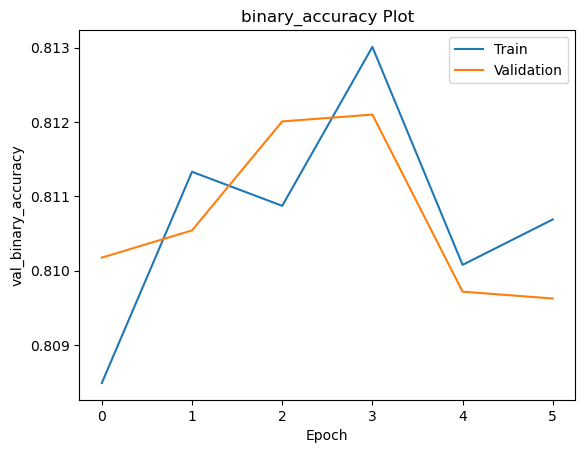

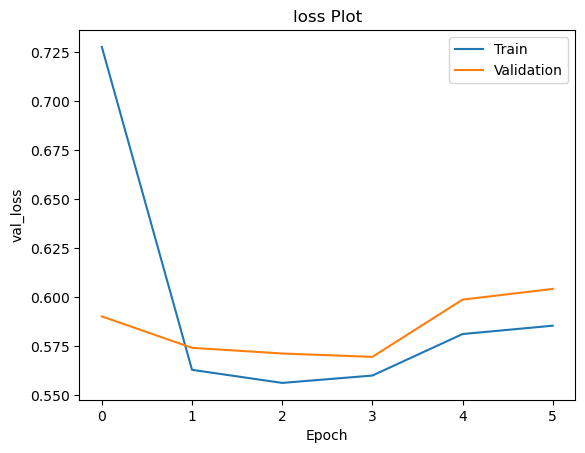

455/455 [==============================] - 1s 2ms/step - loss: 0.5980 - binary_accuracy: 0.8121 - false_negatives_55: 2653.0000


In [317]:
plot(model13_history, 'binary_accuracy')
plot(model13_history,'loss')
m13_test = model13.evaluate(X_test, y_test)

## Model 14 Batch Normalization

### With

In [318]:
model14 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model14.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
model14_history = model14.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 4s 3ms/step - loss: 1.1608 - binary_accuracy: 0.7795 - false_negatives_56: 5545.0000 - val_loss: 0.9788 - val_binary_accuracy: 0.8018 - val_false_negatives_56: 1960.0000
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.9047 - binary_accuracy: 0.7906 - false_negatives_56: 5423.0000 - val_loss: 0.5345 - val_binary_accuracy: 0.8088 - val_false_negatives_56: 1997.0000
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.7314 - binary_accuracy: 0.8038 - false_negatives_56: 5584.0000 - val_loss: 0.5709 - val_binary_accuracy: 0.8112 - val_false_negatives_56: 2029.0000
Epoch 4/100
1023/1023 [==============================] - 4s 4ms/step - loss: 0.6425 - binary_accuracy: 0.7998 - false_negatives_56: 5418.0000 - val_loss: 0.5242 - val_binary_accuracy: 0.8134 - val_false_negatives_56: 1967.0000
Epoch 5/100
1023/1023 [==============================] - 5s 4ms/step - loss: 0.6405 - binary

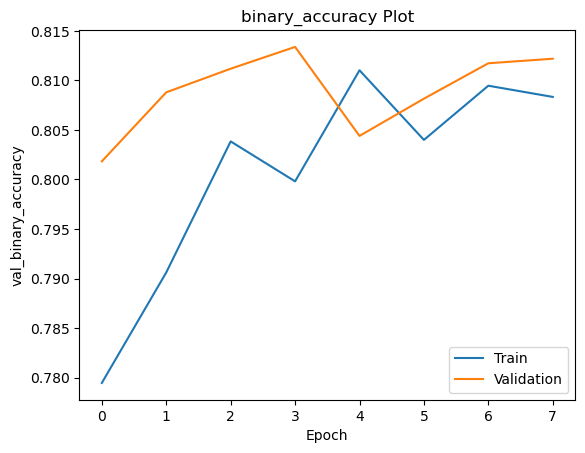

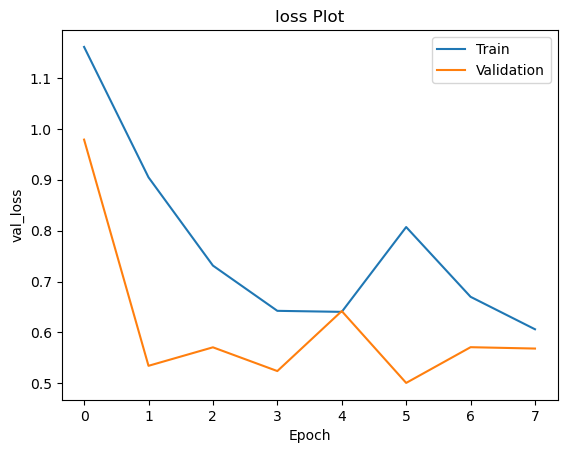

455/455 [==============================] - 1s 2ms/step - loss: 0.5810 - binary_accuracy: 0.8137 - false_negatives_56: 2654.0000


In [319]:
plot(model14_history, 'binary_accuracy')
plot(model14_history,'loss')
m14_test = model14.evaluate(X_test, y_test)

### Without

In [320]:
model15 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[21]),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(1)
])
model15.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
model15_history = model15.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=my_callbacks)

Epoch 1/100
1023/1023 [==============================] - 3s 2ms/step - loss: 0.7036 - binary_accuracy: 0.8107 - false_negatives_57: 5968.0000 - val_loss: 0.5621 - val_binary_accuracy: 0.8121 - val_false_negatives_57: 2024.0000
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5640 - binary_accuracy: 0.8166 - false_negatives_57: 5927.0000 - val_loss: 0.5398 - val_binary_accuracy: 0.8159 - val_false_negatives_57: 1978.0000
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5688 - binary_accuracy: 0.8192 - false_negatives_57: 5751.0000 - val_loss: 0.5265 - val_binary_accuracy: 0.8217 - val_false_negatives_57: 1907.0000
Epoch 4/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5788 - binary_accuracy: 0.8201 - false_negatives_57: 5785.0000 - val_loss: 0.5489 - val_binary_accuracy: 0.8168 - val_false_negatives_57: 1975.0000
Epoch 5/100
1023/1023 [==============================] - 3s 3ms/step - loss: 0.5494 - binary

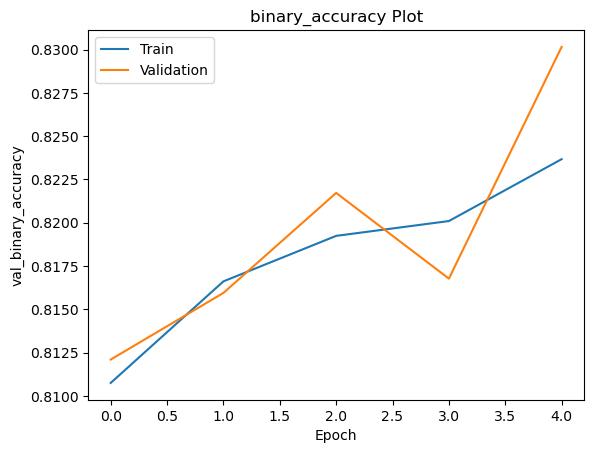

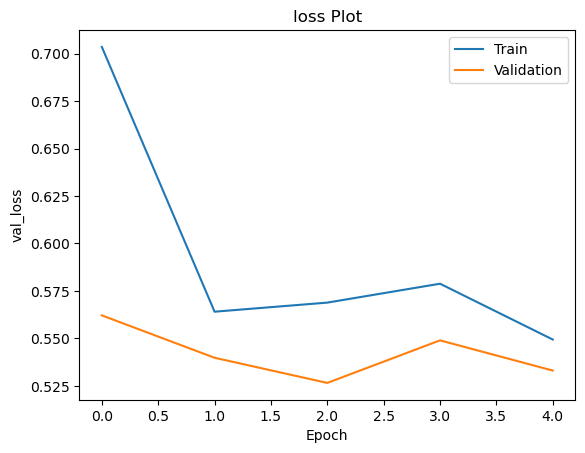

455/455 [==============================] - 1s 2ms/step - loss: 0.5421 - binary_accuracy: 0.8303 - false_negatives_57: 2325.0000


In [321]:
plot(model15_history, 'binary_accuracy')
plot(model15_history,'loss')
m15_test = model15.evaluate(X_test, y_test)

###  Performance with Batch normalization is better as train and validation accuracy is nearby eachother